In [7]:
Pkg.add("Gadfly")

INFO: Cloning cache of Calculus from git://github.com/johnmyleswhite/Calculus.jl.git
INFO: Cloning cache of Codecs from git://github.com/dcjones/Codecs.jl.git
INFO: Cloning cache of Compose from git://github.com/dcjones/Compose.jl.git
INFO: Cloning cache of Contour from git://github.com/tlycken/Contour.jl.git
INFO: Cloning cache of Distances from git://github.com/JuliaStats/Distances.jl.git
INFO: Cloning cache of Distributions from git://github.com/JuliaStats/Distributions.jl.git
INFO: Cloning cache of DualNumbers from git://github.com/JuliaDiff/DualNumbers.jl.git
INFO: Cloning cache of Gadfly from git://github.com/dcjones/Gadfly.jl.git
INFO: Cloning cache of Grid from git://github.com/timholy/Grid.jl.git
INFO: Cloning cache of Hexagons from git://github.com/dcjones/Hexagons.jl.git
INFO: Cloning cache of ImmutableArrays from git://github.com/JuliaGeometry/ImmutableArrays.jl.git
INFO: Cloning cache of Iterators from git://github.com/JuliaLang/Iterators.jl.git
INFO: Cloning cache of Kern

In [8]:
using DataFrames
using Gadfly
using Colors

INFO: Precompiling module Gadfly...
  likely near /Users/edelman/.julia/v0.4/Gadfly/src/Gadfly.jl:307
Expr(:import, :Patchwork)::Any
  ** incremental compilation may be broken for this module **



In [9]:
using Interact

INFO: Precompiling module Reactive...


  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/edelman/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [10]:
df = readtable("output.csv");

const years = [1993.5:0.5:2015.5];

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/edelman/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/edelman/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/edelman/.julia/v0.4/Inter

In [11]:
nth(n) = df[find(df[:rank] .== n), :];

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.0.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:32
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/edelman/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/edelman/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 3


## How the N<sup>th</sup> machine fares

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"rank",250,1:500)

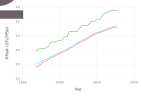

In [12]:

@manipulate for rank=1:500
    plot(
        layer(nth(1), x=years,y=:rmax, Geom.line, Theme(default_color=colorant"green")),
        layer(nth(rank), x=years,y=:rmax, Geom.line),
        layer(nth(500), x=years,y=:rmax, Geom.line, Theme(default_color=colorant"red")),
        Scale.y_log10, Guide.xlabel("Year"), Guide.ylabel("RPeak (GFLOPS/s)"),
    )
end

## Efficiency

In [13]:
firsts[:eff] = firsts[:rmax] ./ firsts[:rpeak];

LoadError: LoadError: UndefVarError: firsts not defined
while loading In[13], in expression starting on line 1

Interact.Slider{Int64}([Reactive.Input{Int64}] 250,"rank",250,1:500)

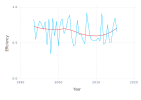

In [14]:
@manipulate for rank=1:500
    df = nth(rank)
    eff = df[:rmax] ./ df[:rpeak];

    plot(
    layer(x=years,y=eff, Geom.line),
    layer(x=years,y=eff, Geom.smooth, Theme(default_color=colorant"red")),
        Guide.xlabel("Year"), Guide.ylabel("Efficiency")
    )
end

# Number of days top 1 took to run HPL

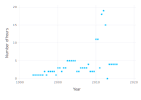

In [15]:
rank=1
x = ((((nth(rank)[:nmax].^big(3))./nth(1)[:rmax])./3600).*10e-9)
plot(x=years, y=ceil(x/24), Guide.xlabel("Year"), Guide.ylabel("Number of hours"))

In [129]:
df1=DataFrame(x = df[find(df[:country] .== "United States"),:][:site] |> sort |> unique);

In [130]:
writetable("locations.csv", df1)